# Exam 1 

### <font color=green>Read each question carefully and use R to show how you calculated each answer</font>

### 1. In a congested city when it rains (which happens one third of the days), there is 50% probability that there will be heavy traffic. On the other hand, if it doesn’t rain, then the probability gets reduced to only 25%. Now, if its rainy and there is heavy traffic, there is 50% chance hat I will arrive late to work, but only 1/8 if it is sunny and no traffic. I will be late only 1/4 of the time if there is rain and no traffic or not rain and traffic.
<br>
<font color=blue> If I today I arrived late to work, what is the probability that we had rain that day.? </font>

<br>

<font color=red>Hint (you can use tree diagrams and conditional probabilities to find the answer)</font>

[1] "\nR = Rain\nT = Traffic\nL = Late\n"

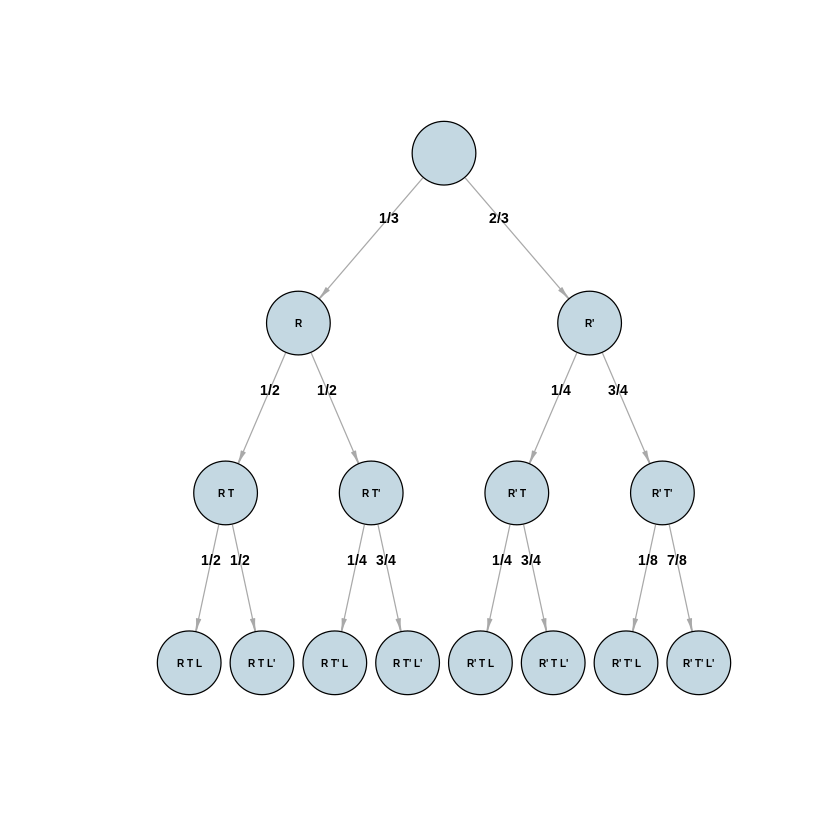

In [25]:
library(igraph)
"
R = Rain
T = Traffic
L = Late
"
g <- graph.tree(n = 2 ^ 4 - 1, children = 2)
node_labels <- c("", "R", "R'", "R T", "R T'", 
                 "R' T", "R' T'","R T L","R T L'",
                 "R T' L","R T' L'","R' T L","R' T L'",
                 "R' T' L","R' T' L'")
edge_labels <- c("1/3", "2/3", "1/2", "1/2",
                 "1/4", "3/4","1/2","1/2",
                "1/4","3/4","1/4","3/4",
                 "1/8","7/8")

plot(g,
     layout = layout_as_tree,           # draw graph as tree
     vertex.size = 25,                  # node size
     vertex.color = '#C4D8E2',          # node color
     vertex.label = node_labels,        # node labels
     vertex.label.cex = .5,             # node label size
     vertex.label.family = "Helvetica", # node label family
     vertex.label.font = 2,             # node label type (bold)
     vertex.label.color = '#000000',    # node label size
     edge.label = edge_labels,          # edge labels
     edge.label.cex = .7,               # edge label size
     edge.label.family = "Helvetica",   # edge label family
     edge.label.font = 2,               # edge label font type (bold)
     edge.label.color = '#000000',      # edge label color
     edge.arrow.size = .5,              # arrow size
     edge.arrow.width = .5              # arrow width
     )

In [26]:
"
P(R|L)=P(R and L)/P(L)

P(R and L)= P(R,T,L)+P(R,T',L) = (1/3*1/2*1/2)+(1/3*1/2*1/4)
P(L)=P(R,T,L)+P(R,T',L)+P(R',T,L)+P(R',T',L) = (1/3*1/2*1/2)+(1/3*1/2*1/4)+(2/3*1/4*1/4)+(2/3*3/4*1/8)

"
P = ((1/3*1/2*1/2)+(1/3*1/2*1/4))/((1/3*1/2*1/2)+(1/3*1/2*1/4)+(2/3*1/4*1/4)+(2/3*3/4*1/8))
P

[1] "\nP(R|L)=P(R and L)/P(L)\n\nP(R and L)= P(R,T,L)+P(R,T',L) = (1/3*1/2*1/2)+(1/3*1/2*1/4)\nP(L)=P(R,T,L)+P(R,T',L)+P(R',T,L)+P(R',T',L) = (1/3*1/2*1/2)+(1/3*1/2*1/4)+(2/3*1/4*1/4)+(2/3*3/4*1/8)\n\n"

[1] 0.5454545

### 2. we classify 2000 email in two groups: 1000 emails as spam and 1000 emails as non-spam. 210 of the spam emails contained the phrase This isn’t spam, 99 had the word prize and 110 the word prince. Of the 99 that contained the word prize, 79 also contained the word prince. On the other hand, of the 1000 non-spam emails, only 23 had the phrase this isn’t spam, 80 the word prize and 110 the word prince. Of the 80 that contained the word prize 8 also contained the word prince.

<br>
<font color=blue>Assuming that the a priori probability of any message being spam is 0.5, what is the probability that an email is spam given it contains the phrase This isn't spam</font>


In [6]:
"
spam 0.5 a
this isn't spam 0.21 c
other spam 0.79 e

not spam 0.5 b
this isn't spam not spam 0.023 d
other not spam 0.977 f

P(spam|thisisntspam) = P(thisisntspam|spam)*P(spam)/(P(thisisntspam|spam)*P(spam)+(P(thisisntspam|notspam)*P(notspam)))
                    = (0.21*0.5)/(0.21*0.5+0.023*0.5)
"

bayes = function(a,b,c,d){
  PrAB <- (a * c)/((a * c)+(b * d)) 
  return(PrAB)
}
bayes(0.5,0.5,0.21,0.023)

[1] "\nspam 0.5 a\nthis isn't spam 0.21 c\nother spam 0.79 e\n\nnot spam 0.5 b\nthis isn't spam not spam 0.023 d\nother not spam 0.977 f\n\nP(spam|thisisntspam) = P(thisisntspam|spam)*P(spam)/(P(thisisntspam|spam)*P(spam)+(P(thisisntspam|notspam)*P(notspam)))\n                    = (0.21*0.5)/(0.21*0.5+0.023*0.5)\n"

[1] 0.9012876

### 3. The Blood Transfusion Service Center in Hsin-Chu City, Taiwan collects data to understand donation habits from a center that passes their blood transfusion service bus to one university in Hsin-Chu City. Data is collected on whether the person donates or not in March as a binary variable, and multiple categorical variables (data obtained from [http://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/](http://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/))

#### R (Recency - months since last donation),
#### F (Frequency - total number of donation),
#### M (Monetary - total blood donated in c.c.),
#### T (Time - months since first donation), and

<br>
<font color=blue> Using contingency tables, calculate the probability that a person donates blood in march given that they donated blood in a Frequency between 18 and 33 times </font>
<br>
<br>
<font color=red> The frequency variable should be converted to a three way categorical variable 1 = 1-17; 2 = 18-33; 3 = 34-50</font>


In [1]:
library("ggplot2")
library("dplyr")
library("reshape2")
library("knitr")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [26]:
#Read transfusion.csv file
tranfusion = read.csv(file = "transfusion.csv")
#group age into 3 groups
tranfusion$freq_group <- with(tranfusion, cut(Frequency, breaks=3, labels=1:3))
head(tranfusion)


Recency,Frequency,Monetary,Time,Donated_In_March,freq_group
2,50,12500,98,1,3
0,13,3250,28,1,1
1,16,4000,35,1,1
2,20,5000,45,1,2
1,24,6000,77,0,2
4,4,1000,4,0,1


In [34]:

tranfusion.march.freq.df <-
  tranfusion %>%
  group_by(Donated_In_March, freq_group) %>%
  summarize(n = n())
tranfusion.march.freq.df %>%
  dcast(Donated_In_March ~ freq_group, value.nar = "n") %>%
  kable(align = "l", format = "markdown",
        table.attr='class="table table-striped table-hover"')

tranfusion.march.freq.prop.df <-
  tranfusion.march.freq.df %>%
  ungroup() %>%
  mutate(prop = n/ sum(n))

tranfusion.march.freq.df %>%
  dcast(Donated_In_March ~ freq_group, value.nar = "prop") %>%
  kable(align = "l", format = "markdown",
        table.attr='class="table table-striped table-hover"')

Donated_In_March.marginal.df <- 
  tranfusion.march.freq.prop.df %>%
  group_by(Donated_In_March) %>%
  summarize(marginal = sum(prop))

freq_group.marginal.df <- 
  tranfusion.march.freq.prop.df %>%
  group_by(freq_group) %>%
  summarize(marginal = sum(prop))

tranfusion.march.freq.prop.df %>%
  dcast(Donated_In_March ~ freq_group, value.var = "prop") %>%
  left_join(Donated_In_March.marginal.df, by = "Donated_In_March") %>%
  bind_rows(
    freq_group.marginal.df %>%
      mutate(Donated_In_March = "marginal") %>%
      dcast(freq_group ~ Donated_In_March, value.var = "marginal")
  ) %>%
  kable(align = "l", format = "markdown",
        table.attr = 'class="table table-striped table-hover"')

Using n as value column: use value.var to override.




|Donated_In_March |1   |2  |3  |
|:----------------|:---|:--|:--|
|0                |561 |7  |2  |
|1                |165 |8  |5  |

Using n as value column: use value.var to override.




|Donated_In_March |1   |2  |3  |
|:----------------|:---|:--|:--|
|0                |561 |7  |2  |
|1                |165 |8  |5  |



|Donated_In_March |1         |2         |3         |marginal  |freq_group |
|:----------------|:---------|:---------|:---------|:---------|:----------|
|0                |0.7500000 |0.0093583 |0.0026738 |0.7620321 |NA         |
|1                |0.2205882 |0.0106952 |0.0066845 |0.2379679 |NA         |
|NA               |NA        |NA        |NA        |0.9705882 |1          |
|NA               |NA        |NA        |NA        |0.0200535 |2          |
|NA               |NA        |NA        |NA        |0.0093583 |3          |

In [37]:
joint.prob <- 
  tranfusion.march.freq.prop.df %>%
  filter(Donated_In_March == 1, freq_group == 2) %>%
  .$prop

marg.prob <- 
  freq_group.marginal.df %>%
  filter(freq_group == 2) %>%
  .$marginal

cond.prob <- joint.prob / marg.prob
cond.prob

[1] 0.5333333

### 4. In a class there are 18 math majors and 25 physics majors. 12 math majors are females as well as 20 physics majors,  

#### <font color=blue>Find the probability that the student selected at random is a math major or a male. </font>

In [10]:
#probability of getting math major is 18/43 = 0.41
#probability of getting a male is (6+5)/43=0.25
"
P(math|male) = P(math)+P(male) - P(both)
P(math) = 18/43
P(male) = 11/43
P(both) = 6/43
"
prob <- function(math,male,both){
    a<- (math+male-both)
    return (a)
}
prob(18/43,11/43,6/43)


[1] "\nP(math|male) = P(math)+P(male) - P(both)\nP(math) = 18/43\nP(male) = 11/43\nP(both) = 6/43\n"

[1] 0.5348837

### 5. There are 6 cars in a car shop out which 3 are defective. If 2 cars are picked randomly, 

#### <font color=blue>Find the probability that at least one is defective.</font>

In [37]:

factorial(2)/(factorial(1)*factorial(1))/(factorial(6)/(factorial(2)*factorial(6-2)))

[1] 0.1333333

### 6. In the past, for every attempt to make a call there was a 70% probability of getting the call. 

#### <br><font color=blue> a. Calculate the probability of having  12 successes in 20 attempts. <br> b. Plot the distribution and describe the shape</font>

[1] 0.1143967

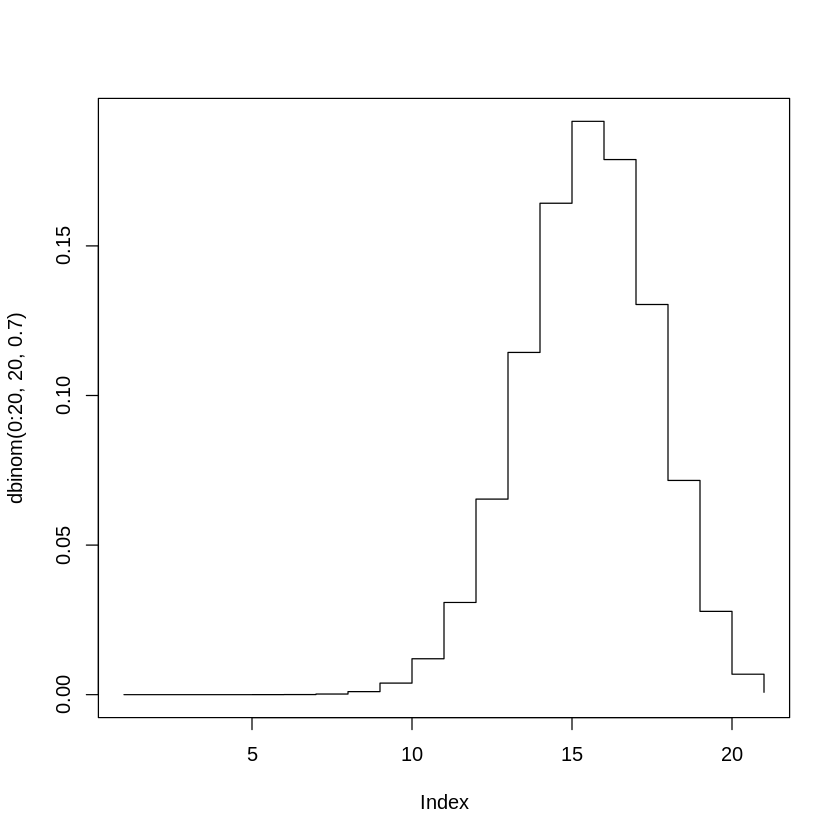

In [33]:

dbinom(12,20,0.7)
plot(dbinom(0:20,20,0.7),type="s")

### 7. A study has shown that 10 in 250 people are infected with a common cold virus, however, the gold standard tests although accurate are not 100% perfect, where in fact if a person has the virus the probability of testing positive is 90%.

#### <br><br> <font color=blue>What the the probability that a person chosen at random has the virus and tests positive?</font>

In [42]:
'
10 in 250 is 
p = 0.04 (has the virus) a
n = 0.96 (no virus) c
90% of testing positive means only 9 of of 10 is positive 
p(p|v) = 0.9 (for test positive) b
and negative is 
p(p|n) = 0.1 (for test negative) d

'
(10/250)*0.9

[1] "\n10 in 250 is \np = 0.04 (has the virus) a\nn = 0.96 (no virus) c\n90% of testing positive means only 9 of of 10 is positive \np(p|v) = 0.9 (for test positive) b\nand negative is \np(p|n) = 0.1 (for test negative) d\n\n"

[1] 0.036

### 8. In an Italian gambling game, a win is when I get at least 11 when three six-sided dice are thrown. Run a 100000 trial simulation of the above game to answer the following questions: 

<br><br> <font color=blue> 1. Would I, in the long run win the game? 
<font color=blue><br> 2. Which is more likely when throwing three dice: an 11 or a 12? 
<font color=blue><br> 3. What is the probability of getting a sum no greater than 7 or no less then 15 when throwing three dice </font>

In [29]:
##Function to roll die
roll <- function(){
  a <- sum(sample(1:6,3,replace = T))
  return(a)
}

trials <- 100000

runtowin <- replicate(trials,roll()>=11)
sum(runtowin)/length(runtowin)
'In the long run you will not win because the probability is only about 50% to win the game'

run11 <- replicate(trials,roll()==11)
#table(run)["TRUE"]/trials

'11 is more likely because we have 12% chance compared to 11% chance of getting 12'
sum(run11)/length(run11)

run12 <- replicate(trials,roll()==12)
#table(run)["TRUE"]/trials
'12'
sum(run12)/length(run12)

#table(run)["TRUE"]/trials
'<=7 or >=15'

run7 <- replicate(trials,roll()<=7)
#table(run)["TRUE"]/trials
seven <- sum(run7)/length(run7)

run15 <- replicate(trials,roll()>=15)
#table(run)["TRUE"]/trials
fifteen <- sum(run15)/length(run15)
sum(seven+fifteen)

[1] 0.49917

[1] "In the long run you will not win because the probability is only about 50% to win the game"

[1] "11 is more likely because we have 12% chance compared to 11% chance of getting 12"

[1] 0.12544

[1] "12"

[1] 0.11515

[1] "<=7 or >=15"

[1] 0.25872

### 9. In a company 3/4 of the females are single, 

### <br><br> <font color=blue> Calculate the probability that within the first 5 randomly selected females we find the first single woman? <br> <font color=blue> In average in how many people we need to select before find a single female?</font>

In [44]:
dgeom(4,3/4)

[1] 0.002929688

### 10. Lets use a mouse random walk The Closed Maze, where a mouse always start on the first chamber and can move randomly to different chambers until it finds a cheese in chambers 7 or 9. From the following diagram calculate:

![title](Mouse_random.png)

<br><br> <font color=blue> 1. The transition matrix
<br> <font color=blue>2. Write a function that simulates this random walk (5000 times ) the mouse starts always from the 1st chamber, 
<br> <font color=blue>3. Plot the mouse random walk simulation using **ONE** of the following vector (steps - N) sizes (10,15, 50,100), 
<br><font color=blue>4. what are the probabilities of finishing in each chamber at each one of these steps sizes?  (table of 4 rows (vector size -N) vs 9 columns (chambers))<br> 


In [7]:
install.packages('markovchain')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [15]:
library(markovchain)
chambers <- c('1','2','3','4','5','6','7','8','9')
mtrix <- matrix(data = c(0,1/2,0,1/2,0,0,0,0,0,
                        1/3,0,1/3,0,1/3,0,0,0,0,
                        0,1/2,0,0,0,1/2,0,0,0,
                        1/3,0,0,0,1/3,0,1/3,0,0,
                        0,1/4,0,1/4,0,1/4,0,1/4,0,
                        0,0,1/3,0,1/3,0,0,0,1/3,
                        0,0,0,0,0,0,1,0,0,
                        0,0,0,0,1/3,0,1/3,0,1/3,
                        0,0,0,0,0,0,0,0,1), byrow = T, nrow = 9,
                        dimnames = list(chambers, chambers))
mcchamber <- new("markovchain", states = chambers, byrow = T,
               transitionMatrix = mtrix, name = "Chambers")
mtrix
mcchamber

,1,2,3,4,5,6,7,8,9
1,0.0000000,0.50,0.0000000,0.50,0.0000000,0.00,0.0000000,0.00,0.0000000
2,0.3333333,0.00,0.3333333,0.00,0.3333333,0.00,0.0000000,0.00,0.0000000
3,0.0000000,0.50,0.0000000,0.00,0.0000000,0.50,0.0000000,0.00,0.0000000
4,0.3333333,0.00,0.0000000,0.00,0.3333333,0.00,0.3333333,0.00,0.0000000
5,0.0000000,0.25,0.0000000,0.25,0.0000000,0.25,0.0000000,0.25,0.0000000
6,0.0000000,0.00,0.3333333,0.00,0.3333333,0.00,0.0000000,0.00,0.3333333
7,0.0000000,0.00,0.0000000,0.00,0.0000000,0.00,1.0000000,0.00,0.0000000
8,0.0000000,0.00,0.0000000,0.00,0.3333333,0.00,0.3333333,0.00,0.3333333
9,0.0000000,0.00,0.0000000,0.00,0.0000000,0.00,0.0000000,0.00,1.0000000


Chambers 
 A  9 - dimensional discrete Markov Chain defined by the following states: 
 1, 2, 3, 4, 5, 6, 7, 8, 9 
 The transition matrix  (by rows)  is defined as follows: 
          1    2         3    4         5    6         7    8         9
1 0.0000000 0.50 0.0000000 0.50 0.0000000 0.00 0.0000000 0.00 0.0000000
2 0.3333333 0.00 0.3333333 0.00 0.3333333 0.00 0.0000000 0.00 0.0000000
3 0.0000000 0.50 0.0000000 0.00 0.0000000 0.50 0.0000000 0.00 0.0000000
4 0.3333333 0.00 0.0000000 0.00 0.3333333 0.00 0.3333333 0.00 0.0000000
5 0.0000000 0.25 0.0000000 0.25 0.0000000 0.25 0.0000000 0.25 0.0000000
6 0.0000000 0.00 0.3333333 0.00 0.3333333 0.00 0.0000000 0.00 0.3333333
7 0.0000000 0.00 0.0000000 0.00 0.0000000 0.00 1.0000000 0.00 0.0000000
8 0.0000000 0.00 0.0000000 0.00 0.3333333 0.00 0.3333333 0.00 0.3333333
9 0.0000000 0.00 0.0000000 0.00 0.0000000 0.00 0.0000000 0.00 1.0000000


In [16]:
P0 = c(0,1/2,0,1/2,0,0,0,0,0)

##one Run
Markov2(10,P0,P)

##Making the plot with 100 runs - and a walk size of 20 steps
N =20
plot(NA, xlim=c(0,20), ylim=c(0,5))#empty plot
datas = matrix(ncol = 20, nrow = 100)
for (i in 1:100){
  datas[i,] = Markov2(N,P0,P)
  condir = datas[i,]
  col = (condir[10]==1 | condir[10]==5)
  lines(condir, lwd=2,col = ifelse(col, "coral","forestgreen"))
}

datas ###this is the resulting matrix -- you can create plot of frequency for each step

table(datas)

[1]  0 -1  0  1  2

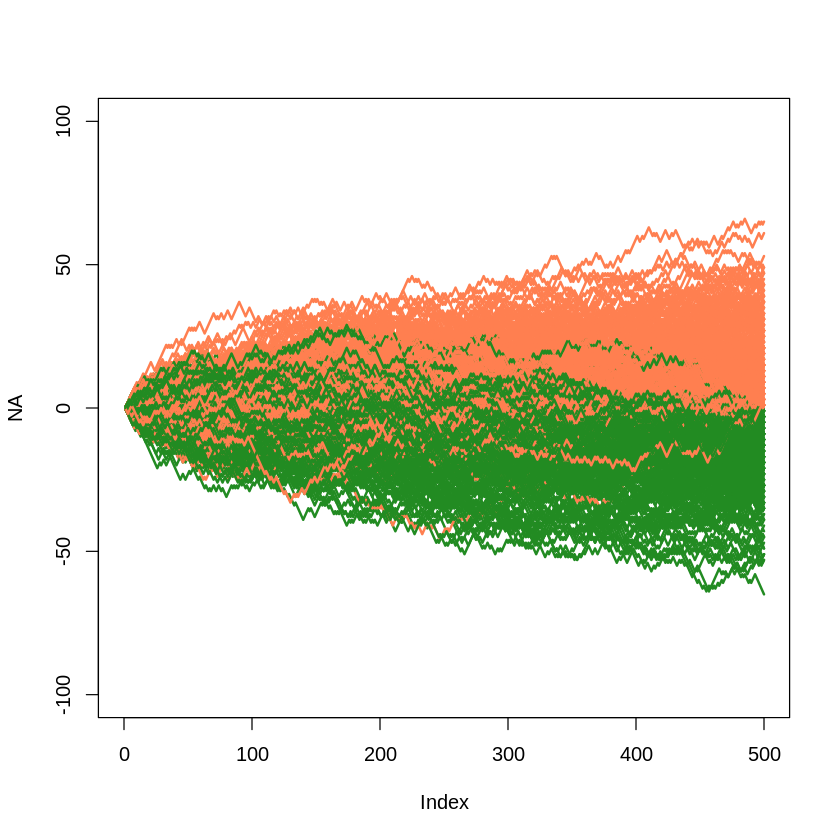

In [16]:
x = 0
random_walk = function(n){
  x=numeric(n)
  init=c(1,-1)
  for(i in 2:n){
    x[i] = x[i-1] + sample(init, 1)
  }
  return(x)
}

stp =500

random_walk(5)

plot(NA, xlim=c(0,500), ylim=c(-100,100))
for (i in 1:stp){
  condir = random_walk(stp)
  colr = condir[500]>=0
  lines(condir, lwd=2, col = ifelse(colr,"coral","forestgreen") )
}